<a href="https://colab.research.google.com/github/ccc-frankfurt/Practical_ML_WS19/blob/master/week1/python_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python basics

You can install packages in Colab with the `apt-get install` and `pip install` commands just like in your system. Below is an example that will tell you that python is already up to date. 
Colab typically has the majority of needed python packages pre-installed: you can find more info and Colab specific tutorials here: https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=xitplqMNk_Hc

In [0]:
!apt-get install python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3 is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


You can also update packages if Colab doesn't have the most recent version if necessary. You might have to restart the run-time after the upgrrade is done for the first time.

In [0]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## General

### Official python documentation

https://docs.python.org/3.6/tutorial/datastructures.html

### Informations about functions

In jupyter or the interactive shell, run 

```>>> help(function)```

or

```>>> ?function```

to get information about the function.

### Informations about packages/classes

In [0]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

## Lists and arrays
(it is assumed that basic datatypes (int, float, str, etc.) are well-known already)

### Creating a list

```my_list = []```

or 

```my_list = list()```

or

```my_list = ["a", 2, 15, 3.1415]```


### References and values

When you create a new list my_list, you’re storing the list in memory, and the address of that list is stored in the my_list variable. The variable my_list doesn’t contain the elements of the list. It contains a reference to the list. If we copy a list with the equal sign only like this my_list_copy = my_list, you’ll have the reference copied in the my_list_copy variable instead of the list values. So, if you want to copy the actual values, you can use the list(my_list) function or slicing [:].

In [0]:
my_list = ["a", 2, 15, 3.1415]
my_copy = my_list
my_copy[0] = "b"
print(my_list)

['b', 2, 15, 3.1415]


### List Slicing

Slicing is a powerful tool to select subsets or elements from a list (or an np.array, as we will see later).
**Indexing starts at 0!**

In [0]:
my_list[0] # select the first element

'b'

In [0]:
my_list[:2] # select the first two elements

['b', 2]

In [0]:
my_list[-2:] # select the last two elments

[15, 3.1415]

In [0]:
my_list[1:3] # select element 1 to 2

[2, 15]

In [0]:
my_list[::2] # select every second element

['b', 15]

In [0]:
my_list[::-1] # reverse

[3.1415, 15, 2, 'b']

### Numpy

Powerful, fast package for scientific computing.

Multidimensional, efficient array implementations with a lot of built-in methods.

__Important__: Elements of numpy arrays always have the same type

In [0]:
import numpy as np

### Creating arrays

Similar to lists, we can create empty numpy arrays:
    
```my_array = np.array([]) # form an empty list```

```my_array = np.array([[1,2,3],[4,5,6]]) # form a list with elements```

```my_array = np.zeros((2,3), dtype=np.int) # creates an array with six elements, sets them to zero```

```my_array = np.empty((2,3), dtype=np.int) # reserve space, but do not set values (marginally faster than zeros)```

In [0]:
my_array = np.array([[3.,2,3],[4,5,6]])
print(my_array) # all values are casted to int
print("shape: ", my_array.shape)
print("dtype: ", my_array.dtype)

[[3. 2. 3.]
 [4. 5. 6.]]
shape:  (2, 3)
dtype:  float64


In [0]:
my_array_copy = my_array # like lists, only reference assigned!
my_array_copy[0,0] = 1337
print(my_array)

[[1337.    2.    3.]
 [   4.    5.    6.]]


### Slicing in multidimensional numpy arrays

In [0]:
my_array[1,2] # get third element of second row

6.0

In [0]:
my_array[:,1] # get all elements of second column

array([2., 5.])

In [0]:
my_array[1,:] # get all elements of second row

array([4., 5., 6.])

In [0]:
my_array[1,::-1] # get all elements of second row in reverse order

array([6., 5., 4.])

### Some operations

In [0]:
a = np.array([
                [1,0,0],
                [0,1,0],
                [0,0,1]
            ])

b = np.array([
                [1,2,3],
                [4,5,6],
                [7,8,9]
        
            ])

print("elementwise operations\n", a*b)
print("matrix product\n", np.dot(a,b))

elementwise operations
 [[1 0 0]
 [0 5 0]
 [0 0 9]]
matrix product
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


#### One more dimension, please

Images are typically represented as multi-dimensional numpy arrays.

The Y-axis (height) is the first, X-axis  (width) the second, and the color-channel-axis is the third dimension:


In [0]:
import requests
from PIL import Image

img_url = "https://media.boingboing.net/wp-content/uploads/2016/03/fabio.jpg"

img = Image.open(requests.get(img_url, stream=True).raw)
img = np.array(img)

print("image shape: ", img.shape)
print("image dtype: ", img.dtype)

image shape:  (720, 1280, 3)
image dtype:  uint8


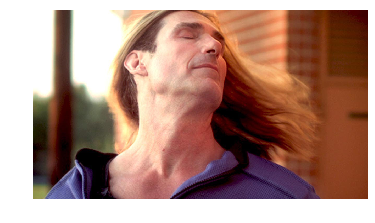

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # powerful plotting package

fig = plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
# get one specific pixel value - Remember, R-G-B
img[300,300,:]

array([253, 193, 131], dtype=uint8)

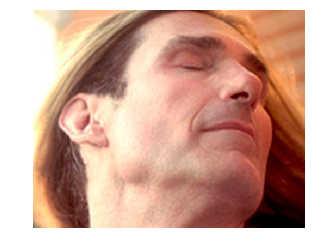

In [0]:
# get a 2d slice of the image, with all color channels
fig = plt.figure()
sub_img = img[0:400, 300:800,:]
plt.imshow(sub_img)
plt.axis('off')
plt.show()

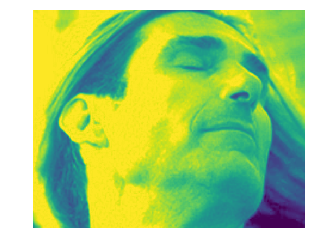

In [0]:
# get a 2d-slice of the image, with only the red channel
fig = plt.figure()
sub_img = img[0:400, 300:800, 0]
plt.imshow(sub_img)
plt.axis('off')
plt.show()

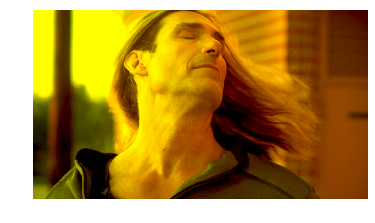

In [0]:
# set the blue-channel to zero
fig = plt.figure()
img[:,:,2] = 0
plt.imshow(img)
plt.axis('off')
plt.show()

## Plotting

"...make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding."
-- F. J. Anscombe, 1973

![anscombe_quartet](https://d2f99xq7vri1nk.cloudfront.net/Anscombe_1_0_0.png)

source: https://d2f99xq7vri1nk.cloudfront.net/Anscombe_1_0_0.png

### Matplotlib and seaborn

Matplotlib: Already satisfies most plotting needs, even for publication quality plots
    
Seaborn: Makes them even nicer, brings some additional tools for statistical data visualization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

random_data = np.array([np.random.randint(0,10,50), np.random.randint(0,10,50)])
random_data

array([[2, 7, 7, 2, 0, 0, 8, 0, 8, 9, 6, 3, 9, 0, 5, 4, 4, 0, 8, 3, 3, 5,
        3, 3, 9, 0, 0, 6, 4, 8, 7, 8, 8, 6, 4, 6, 0, 5, 6, 1, 6, 0, 4, 5,
        0, 2, 2, 4, 1, 4],
       [4, 4, 9, 1, 0, 1, 2, 5, 9, 2, 3, 4, 3, 7, 6, 9, 1, 6, 4, 7, 6, 0,
        9, 6, 7, 5, 6, 1, 4, 9, 0, 6, 9, 3, 1, 5, 9, 4, 9, 3, 9, 6, 1, 0,
        3, 7, 9, 9, 7, 1]])

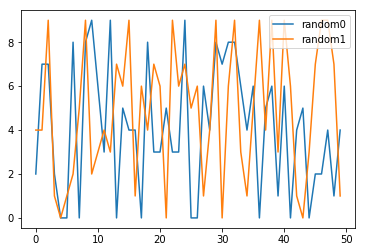

In [0]:
fig = plt.figure()
plt.plot(random_data[0], label='random0')
plt.plot(random_data[1], label='random1')
plt.legend(loc=1, frameon=True)
plt.show()

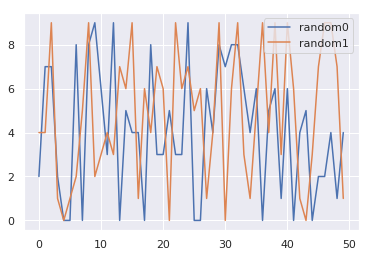

In [0]:
import seaborn as sns
sns.set()

fig = plt.figure()
plt.plot(random_data[0], label='random0')
plt.plot(random_data[1], label='random1')
plt.legend(loc=1, frameon=True)
plt.show()

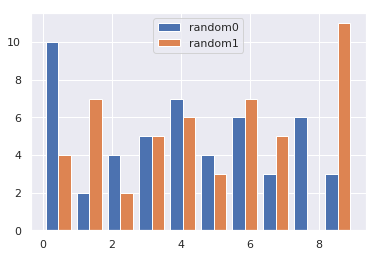

In [0]:
fig = plt.figure()
plt.hist([random_data[0],random_data[1]], label=["random0", "random1"])
plt.legend(frameon=True)

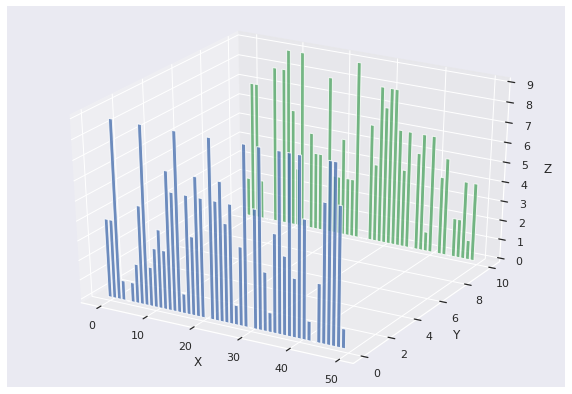

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
for idx,(c, z) in enumerate(zip(['g', 'b'], [10, 0])):
    xs = np.arange(len(random_data[0]))
    ys = random_data[idx]

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Pandas data frames

Don't worry about the specifics of the datasets that are being loaded below for now. This is just an introduction to the functional API of pandas so we can visualize and show some more complex plots. We will have a more thorough introduction to pandas in the next weeks. 

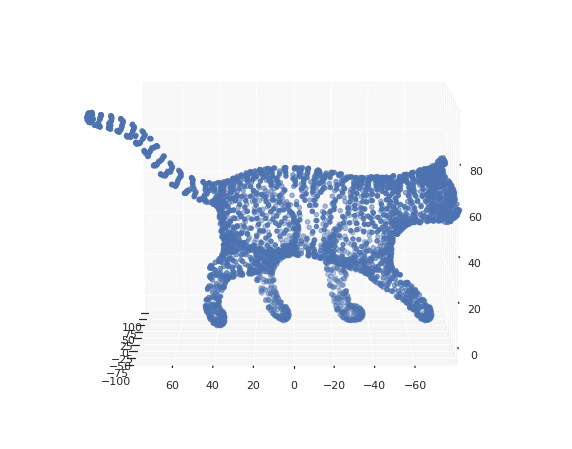

In [0]:
import pandas as pd
 
# use pandas to read csv data from url
source = "https://raw.githubusercontent.com/PointCloudLibrary/data/master/tutorials/ism_train_cat.pcd"
cat_df = pd.read_csv(source, skiprows=11, delimiter=" ", names=["x","y","z"], encoding='latin_1')
cat_df.head()

# visualize the data in 3-d
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d', facecolor='white') 
ax.scatter(cat_df.x, cat_df.y, cat_df.z)
ax.view_init(azim=180, elev=10)
plt.axis('equal')
plt.ylim((-100,100))
plt.xlim((-100,100))
plt.show()

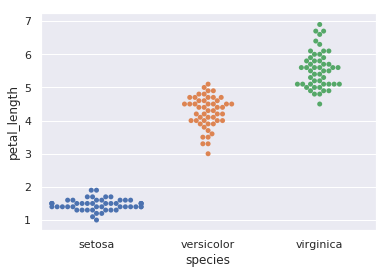

In [0]:
# Load iris data as an example of a dataset with different attributes.
fig = plt.figure()
iris = sns.load_dataset("iris")
sns.swarmplot(x="species", y="petal_length", data=iris)
plt.show()

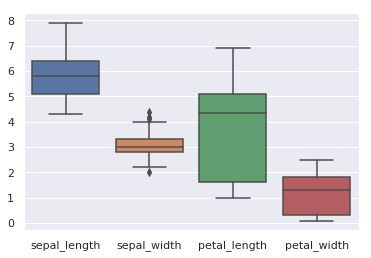

In [0]:
fig = plt.figure()
sns.boxplot(data=iris)
plt.show()

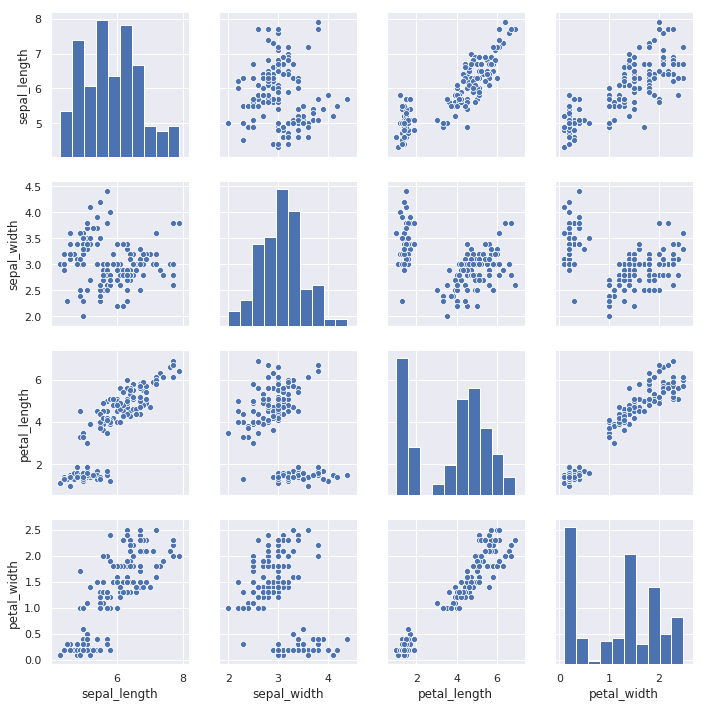

In [0]:
sns.pairplot(data=iris)
plt.show()

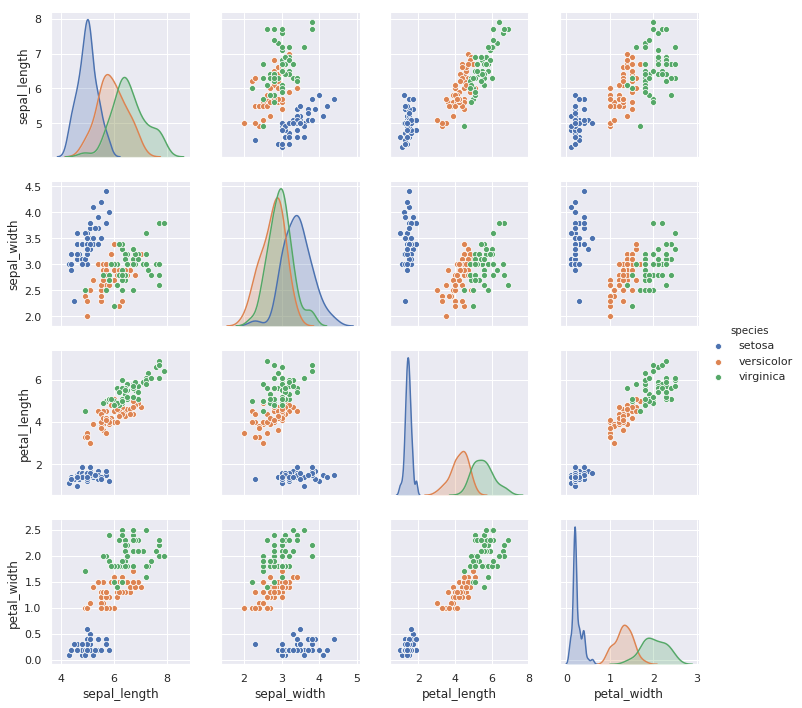

In [0]:
sns.pairplot(data=iris, hue='species')
plt.show()

### Best practices
Make sure that 
* all of your plots have consistent style in a report/paper/document
* all text is large enough
* contain a title or a caption
* axes are labeled AND show what unit it is in

#### Colormaps

* colors are suited also for colorblind people
* colored plots can still be understood if printed in grayscale
* do NOT use colormaps such as "jet" for continuous data as they will introduce artificial boundaries where there are none. See https://www.youtube.com/watch?v=xAoljeRJ3lU for a video of why matplotlib has therefore changed its default colormap. 

![jet](https://pbs.twimg.com/media/DaNjmLmVAAAbI9y.jpg) 
![viridis](https://pbs.twimg.com/media/DaNjmLnU0AAodbD.jpg)

There are many more colormaps that are suited for e.g. categorial data. Further information for seaborn or matplotlib can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html

## pandas Loading and handling tabular data(sets)
Sources:
* https://pandas.pydata.org/pandas-docs/stable/10min.html#min

In [0]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris') # seaborn gives you sample datasets directly as pandas dataframe
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# ... but of course you can just parse a csv-file
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [0]:
iris[0:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [0]:
iris.sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [0]:
iris.sepal_width.describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [0]:
iris[iris.sepal_width > 3.0]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa


In [0]:
iris[iris.sepal_width > 3.0].count()

sepal_length    67
sepal_width     67
petal_length    67
petal_width     67
species         67
dtype: int64

In [0]:
features = iris.columns[:4]
iris[features].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
iris.groupby(iris.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### We will use all of the concepts we have just revisited in next week's sessions when we get to know about logistic regression and apply it to the Titanic dataset. 

#### Please make sure that you are familiar with the shown operations in order to guarantee that you can concentrate on the machine learning specific methods from now on and don't get stuck on things such as visualization. 